In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 9)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 14

In [32]:
def init(mu, sigma, seed_arr, root, price_init, minutes, plot_init):
    loop_var = 0
    for seed in seed_arr:
        np.random.seed(seed)
        global df
        df = pd.DataFrame(columns = ['time', 'price', 'delta', 'quantity'])
        df['delta'] = np.random.normal(mu, sigma, minutes + 1)
        df['time'] = df.index
        df.loc[0, 'price'] = price_init
        for i in range(1, minutes + 1):
            df.loc[i, 'price'] = df.loc[(i-1), 'price'] + df.loc[(i - 1), 'delta']
        if seed == root:
            color = '#ff7200'
        else:
            color = [0.7,0.7,0.7]    
        if(plot_init == True):
            #plt.axhline( y = price_init, linewidth=3, color=[0.7, 0.7, 0.7])
            plt.grid(b=True, which='major', color=[0.2,0.2,0.2])
            plt.xlabel('minutes')
            plt.ylabel('price')
            plt.ylim((70,120))
            plt.plot(df['time'], df['price'], linewidth = 4, color = color, alpha = 0.8)
        loop_var = loop_var + 1

In [33]:
def share_plot(param_arr, price_init, quantity_init, minutes, buy, delta):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])    

    for param in param_arr:
        df.loc[0, 'quantity'] = quantity_init
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        i = 1
        for x in range(1, minutes):
            if df.loc[i, 'price'] >= price_up:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
            elif df.loc[i, 'price'] <= price_down:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] + buy
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        plt.xlabel('minutes')
        plt.ylabel('quantity')
        if param == delta:
            color = 'magenta'
        else:
            color = [0.5,0.5,0.5]
        plt.plot(df['time'], df['quantity'], color = color, linewidth = 4, alpha = 0.8)
        loop_var = loop_var + 1

In [34]:
def share_plot2(param_arr, price_init, quantity_init, minutes, buy, delta):
    loop_var = 0
    #plt.axhline(y = quantity_init, linewidth=5, color=[0.7, 0.7, 0.7])
    plt.grid(b = True, which = 'major', color = [0.2,0.2,0.2])
    
    for param in param_arr:
        df.loc[[0, 1], 'quantity'] = quantity_init
        i = 1
        price_up = price_init * (1 + param /100)
        price_down = price_init * (1 - param/100)
        for x in range(1, minutes):
            if((df.loc[(i-1), 'price'] >= price_up) and (df.loc[(i-2), 'price'] >= price_up)):
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
            elif(df.loc[(i-1), 'price'] <= price_down) and (df.loc[(i-2), 'price'] <= price_down):
                if(df.loc[i-1, 'quantity'] == 0): 
                    df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
                else:
                    df.loc[i, 'quantity'] = df.loc[i-1, 'quantity'] - buy
            else:
                df.loc[i, 'quantity'] = df.loc[i-1, 'quantity']
            i = i + 1
        plt.plot(df['time'], df['quantity'], color = [0.5,0.5,0.5], alpha = 0.8)
        loop_var = loop_var + 1

<h2>Single model, single parameter</h2>

In [35]:
p = 100
mu = 0
sigma = 0.5
minutes = 500
root = 500

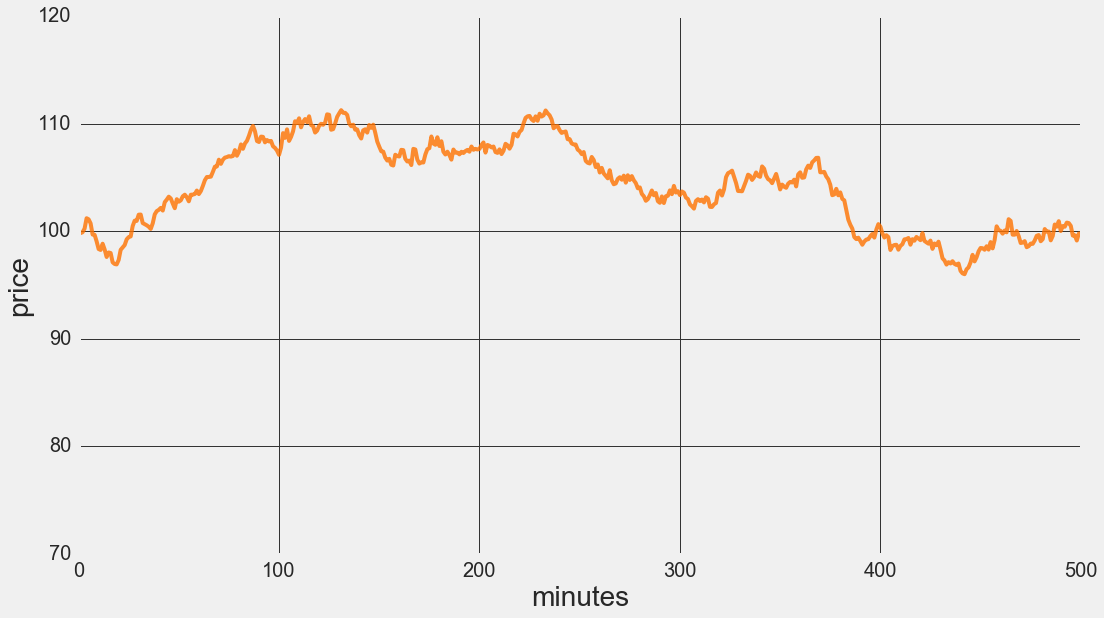

In [36]:
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = True)

In [37]:
df.head()

,time,price,delta,quantity
0,0,100,-0.188682,NaN
1,1,99.8113,0.083379,NaN
2,2,99.8947,0.341401,NaN
3,3,100.236,0.960689,NaN
4,4,101.197,-0.098518,NaN


In [38]:
df.tail()

,time,price,delta,quantity
496,496,99.5815,0.030429,NaN
497,497,99.612,-0.487687,NaN
498,498,99.1243,0.646786,NaN
499,499,99.7711,0.002442,NaN
500,500,99.7735,-0.039403,NaN


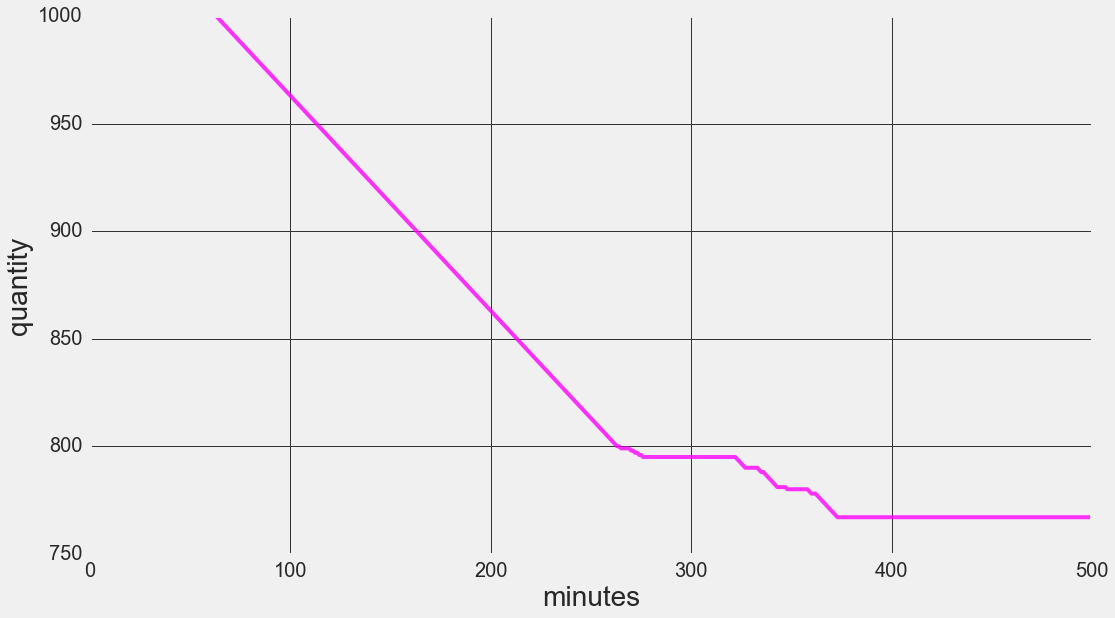

In [39]:
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%

<h2>Varying parameter</h2>

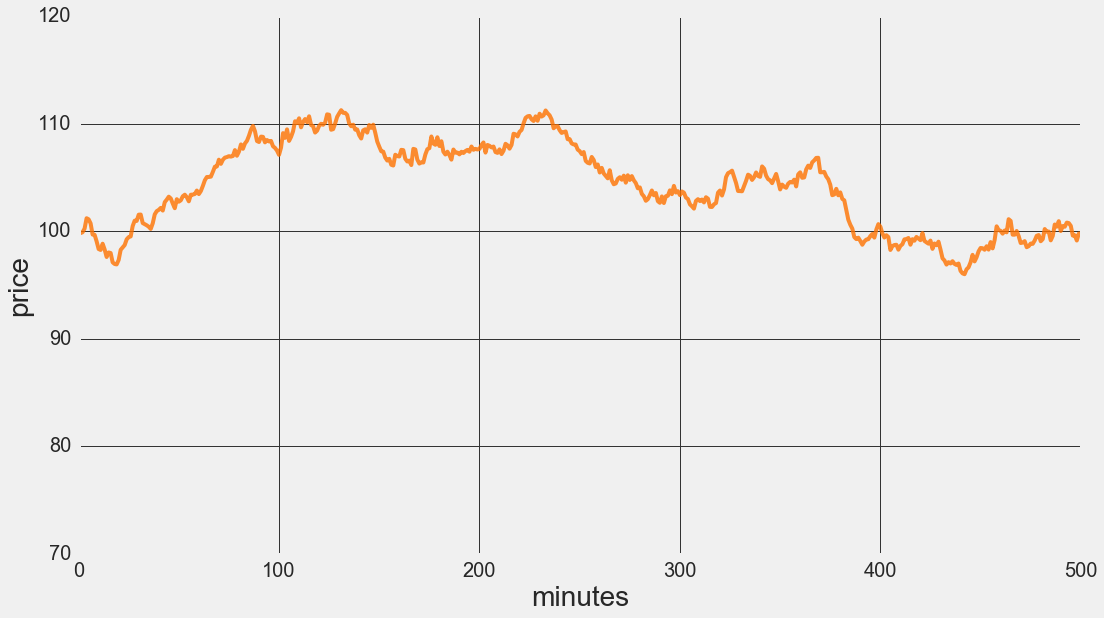

In [40]:
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = True)

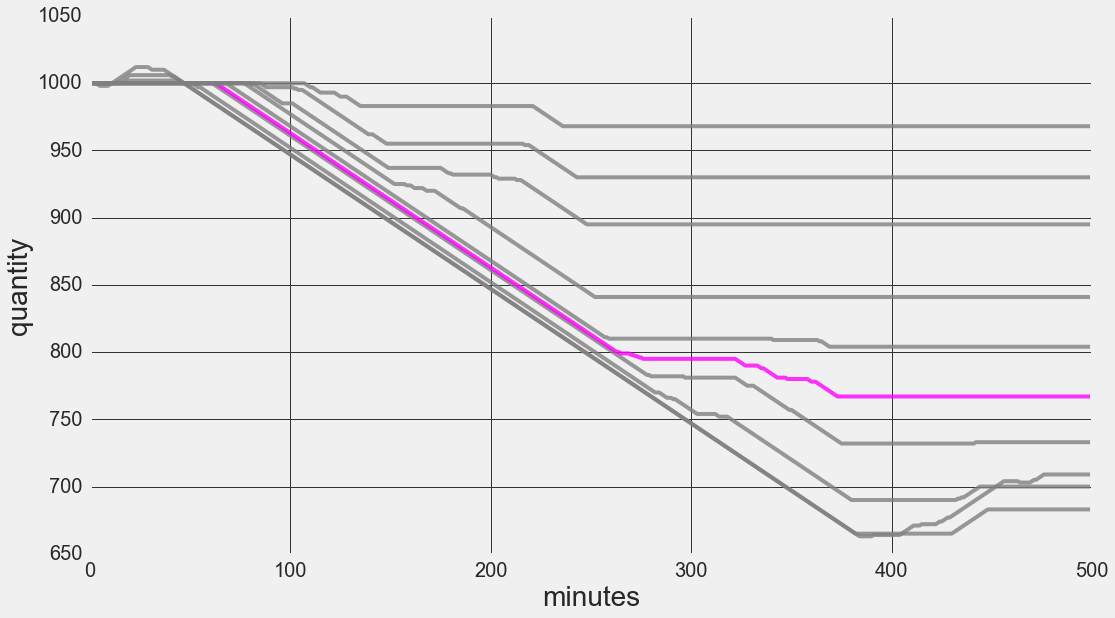

In [41]:
share_plot(param_arr = list(range(1,11)), price_init = 100, quantity_init = 1000, minutes = 500, buy = 1, delta = 5)

<h2>Varying Input</h2>

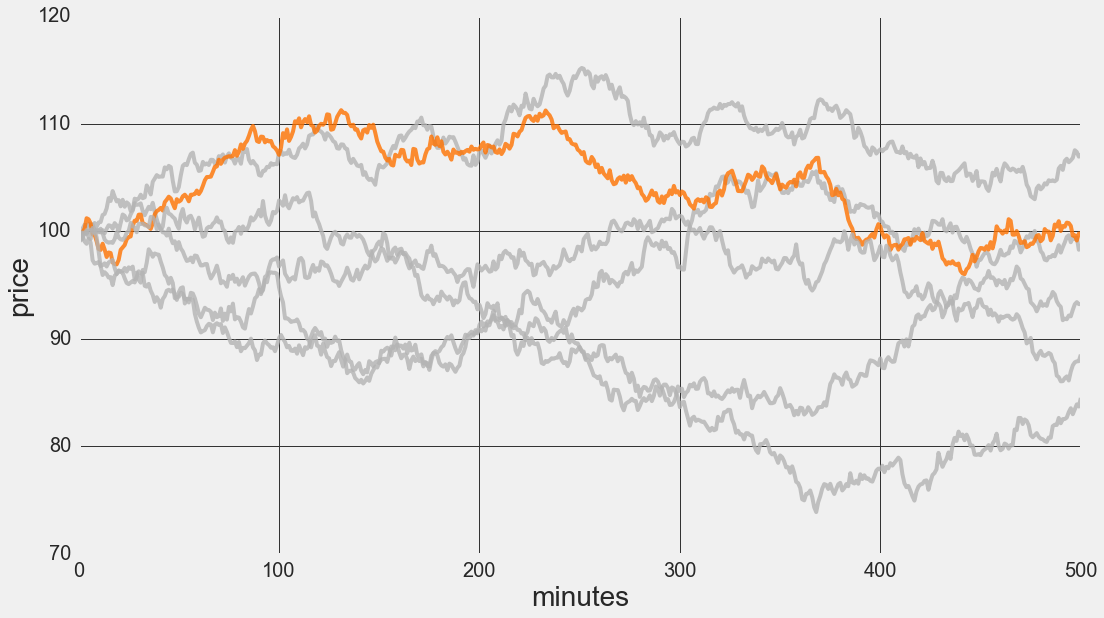

In [42]:
init(mu = mu, sigma = sigma, seed_arr = [100, 200, root, 800, 1000, 1600], root = root, \
     price_init = p, minutes = minutes, plot_init = True)

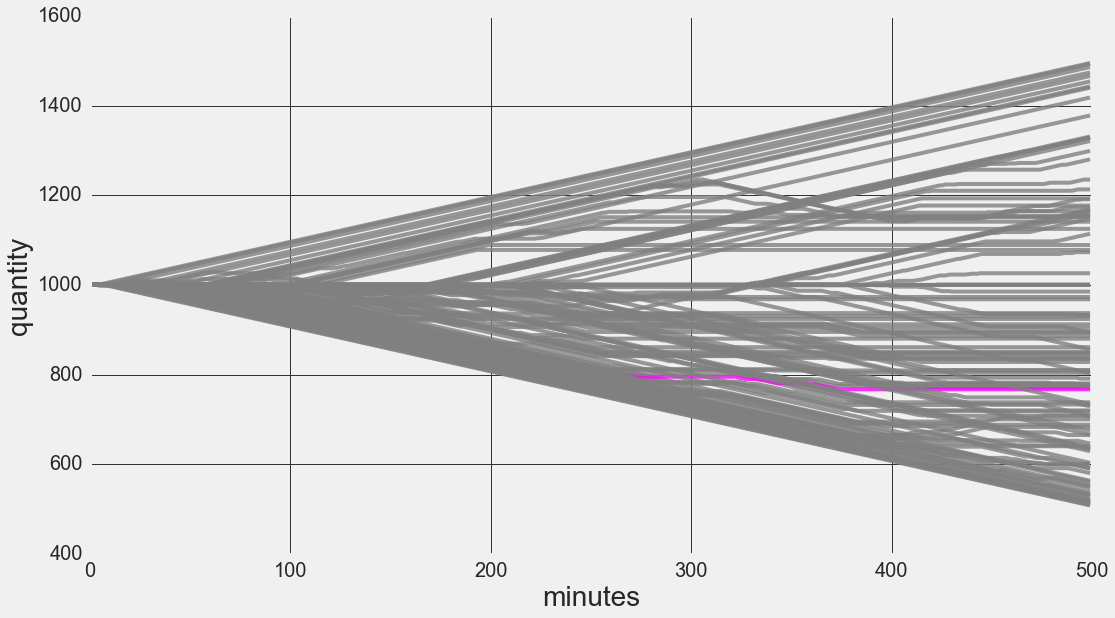

In [43]:
init(mu = mu, sigma = sigma, seed_arr = [100], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [200], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [800], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1000], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1200], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 11) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%

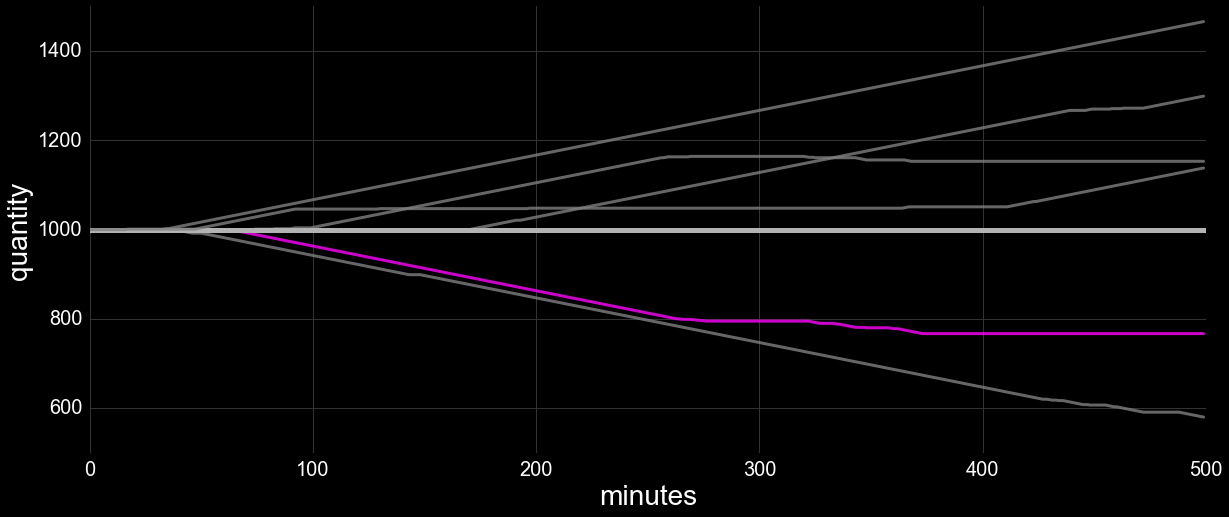

In [21]:
init(mu = mu, sigma = sigma, seed_arr = [100], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [200], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [800], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1000], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%
init(mu = mu, sigma = sigma, seed_arr = [1600], root = root, price_init = p, minutes = minutes, plot_init = False)
share_plot(param_arr = [5], price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 4) #WITH +-5%

<h2>Multiple Models</h2>

In [22]:
init(mu = mu, sigma = sigma, seed_arr = [root], root = root, price_init = p, minutes = minutes, plot_init = False)

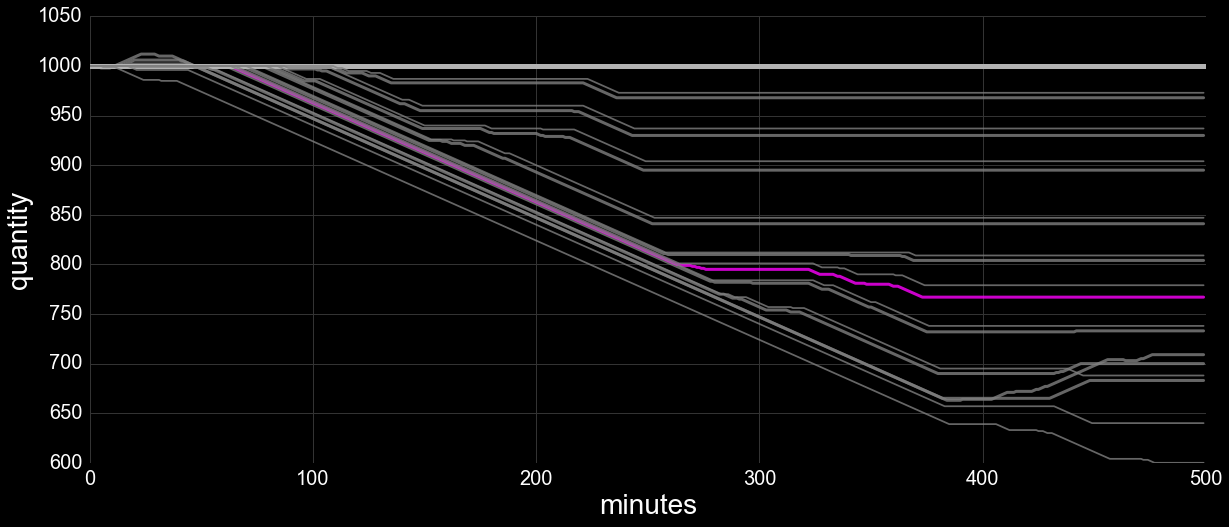

In [23]:
share_plot(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%
share_plot2(param_arr = list(range(1,11)), price_init = p, quantity_init = 1000, minutes = minutes, buy = 1, delta = 5) #WITH +-5%